# Sellable
## Find Best Fit Model for the Valuation Prediction

<div class="alert alert-block alert-info">
<b>Import all required libraries and folders</b> 
</div>

In [2]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

import math

# S C I P Y
import scipy.stats as stats

# P L O T T I N G 
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

# P A N D A S and N U M P Y
import numpy as np
import pandas as pd

#from myfunctions import myfunc
import myfunctions as myfunc

C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<div class="alert alert-block alert-info">
<b>Using Pandas DataFrames</b>&nbsp;&nbsp;&nbsp;Use the .read_csv() function to read the new_sample_file.csv file
</div>

In [3]:
#df = pd.read_csv('/Users/sergi/Downloads/Test Scrapping/Sellable/Datasets/new_sample_file.csv')
df = pd.read_csv('../Datasets/OUTPUT/Combined_Output_fileComplete NSW Blacktown areas.csv')

<div class="alert alert-block alert-info">
<b>Clean DataFrame</b>
</div>

In [4]:
df

,Unnamed: 0,id,gnaf_address_id,street,suburb,postcode,state_code,latitude,longitude,type,...,SaleType2,DateSold1,DateSold2,SoldPrice1,SoldPrice2,Picture,Blob,Street_Numb,Street_Name,Street_Suff
0,0,2624405,10936,2/20 Tallawong Avenue,Blacktown,2148,NSW,-33.776417,150.884300,unit,...,,,,,,https://p360images.realestateview.com.au/defau...,This is a unit in Blacktown with 3 bedrooms an...,2/20,Tallawong,Avenue
1,1,2933247,33627,30/1-3 Kleins Road,Northmead,2152,NSW,-33.794310,150.995600,unit,...,,,,,,https://s3-ap-southeast-2.amazonaws.com/view-p...,This is a unit in Northmead with 3 bedrooms an...,30/1-3,Kleins,Road
2,2,51119,36445,67/8-18 Briens Road,Northmead,2152,NSW,-33.792717,150.996750,unit,...,Private Sale,,Dec 2009,,"$365,000",https://p360images.realestateview.com.au/defau...,"This is a unit in Northmead, 2152 with 2 bedro...",67/8-18,Briens,Road
3,3,1695987,40189,29/459-463 Church Street,Parramatta,2150,NSW,-33.804096,151.005480,unit,...,,Apr 2012,,"$450,000",,https://p360images.realestateview.com.au/defau...,"This is a unit in Parramatta, 2150 with 2 bedr...",29/459-463,Church,Street
4,4,216227,43622,26 Australorp Avenue,Seven Hills,2147,NSW,-33.782587,150.929551,house,...,Private Sale,May 1996,Jun 1992,"$159,000","$152,500",https://s3-ap-southeast-2.amazonaws.com/view-p...,26 Australorp Avenue is a house in Seven Hills...,26,Australorp,Avenue
5,5,4060929,45824,7 Marampo Street,Marayong,2148,NSW,-33.745500,150.884890,house,...,,Jun 2009,,"$350,000",,https://s3-ap-southeast-2.amazonaws.com/view-p...,7 Marampo Street is a house in Marayong with 3...,7,Marampo,Street
6,6,4071100,51838,78 Hassall Street,Parramatta,2150,NSW,-33.818424,151.016800,house,...,,,,,,https://s3-ap-southeast-2.amazonaws.com/view-p...,"78 Hassall Street, Parramatta 2150 NSW is a ho...",78,Hassall,Street
7,7,68378,75889,26 Dan Avenue,Blacktown,2148,NSW,-33.762730,150.895520,house,...,Private Sale,May 2009,Mar 2001,"$160,000","$210,000",https://s3-ap-southeast-2.amazonaws.com/view-p...,26 Dan Avenue is a house in Blacktown with 5 b...,26,Dan,Avenue
8,8,890748,82641,108A Douglas Road,Blacktown,2148,NSW,-33.781316,150.880683,house,...,Private Sale,May 2003,Sep 1999,"$310,000","$219,950",https://p360images.realestateview.com.au/defau...,This is a house in Blacktown with 4 bedrooms a...,108A,Douglas,Road
9,9,3932768,82943,22 Larra Crescent,North Rocks,2151,NSW,-33.761289,151.012126,house,...,,,,,,https://s3-ap-southeast-2.amazonaws.com/view-p...,"22 Larra Crescent, North Rocks 2151 NSW is a h...",22,Larra,Crescent


In [5]:
df[['Valuation']] = df[['Valuation']].replace('[!a-zA-Z+&,.\$£/:)(]', '', regex=True)
df[['Valuation']] = df[['Valuation']].replace(' ', np.nan, regex=True)
include = ['suburb', 'Beds', 'Baths', 'Car', 'Lot', 'Valuation']
cat_list = ['suburb']
df = df[include].dropna()
df.Valuation = df.Valuation.astype(int)

<div class="alert alert-block alert-info">
<b>Create DUMMYS from Categorical List</b> 
</div>

In [6]:
#CREATE REFERENCE COPY
df_copy = df.copy(deep=True)

# Create DUMMYS from Categorical List

df_copy = pd.get_dummies(df_copy, columns = cat_list, drop_first = False)  # Create dummy cols into the DataFrame

In [7]:
df_copy.columns

Index(['Beds', 'Baths', 'Car', 'Lot', 'Valuation', 'suburb_Blacktown',
       'suburb_Harris Park', 'suburb_Kings Langley', 'suburb_Kings Park',
       'suburb_Lalor Park', 'suburb_Marayong', 'suburb_North Parramatta',
       'suburb_North Rocks', 'suburb_Northmead', 'suburb_Old Toongabbie',
       'suburb_Parramatta', 'suburb_Prospect', 'suburb_Seven Hills',
       'suburb_Toongabbie'],
      dtype='object')

<div class="alert alert-block alert-info">
<b>Valuation Histogram</b>
</div>

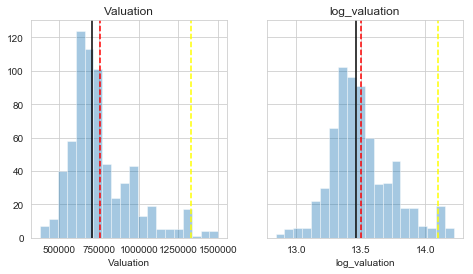

In [7]:
# Create a new feature of the natural log of the sale price
#df_copy['log_valuation'] = np.log(df_copy.Valuation)
df_copy['log_valuation'] = np.log(df_copy.Valuation + 1)

name = ['Valuation', 'log_valuation']
fig, ax = plt.subplots(1, 2, sharex = 'col',sharey = 'row')
plt.subplots_adjust(left = 1,right = 2)
    
for num in range(len(name)):
    ax[num].set_title(name[num], y = 1)
    ax[num].axvline(np.median(df_copy[name[num]]),     color = 'black',  linestyle = '-', lw = 1.5)    # Median  
    ax[num].axvline(np.mean(df_copy[name[num]]),       color = 'red',    linestyle = '--', lw = 1.5)    # Mean  
    ax[num].axvline(stats.mode(df_copy[name[num]])[0], color = 'yellow', linestyle = '--', lw = 1.5)    # Mode  
    sns.distplot(df_copy[name[num]], bins = 20, kde = False, ax = ax[num])

In [12]:
np.mean(df_copy['Valuation'])

755297.7645305514

<div class="alert alert-block alert-info">
<b>Prepare Train, Test and Split Dataset</b>
</div>

In [7]:
column_list=df_copy.columns.tolist()

In [8]:
column_list.remove('Valuation')
column_list.remove('log_valuation')

In [9]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(df_copy[column_list], df_copy[['log_valuation']], test_size=0.3)

<div class="alert alert-block alert-info">
<b>STANDARDIZE Features</b> 
</div>

In [10]:
# STANDARDIZE Features
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
Xtrn[column_list] = scale.fit_transform(Xtrn[column_list])
Xtest[column_list]  = scale.transform(Xtest[column_list])

print ('Train:\t', Xtrn.isnull().sum().sum(), 'nulls\nTest:\t', Xtest.isnull().sum().sum(), 'nulls')
print ('Train:', Xtrn.shape, '  Test:', Xtest.shape)

Train:	 0 nulls
Test:	 0 nulls
Train: (469, 18)   Test: (202, 18)


<div class="alert alert-block alert-info">
<b>Lasso</b> 
</div>

In [11]:
#LASSO METHOD
from sklearn.linear_model import Lasso, LassoCV
def use_lasso(X, y, cols, folds = 5):
    #Find Optimal Alpha
    optimal = LassoCV(cv = folds, verbose = 1)
    optimal.fit(X, y)
    print ('LASSO\nOptimal Alpha:', optimal.alpha_)

    #Use Optimal Alpha
    model = Lasso(alpha = optimal.alpha_)
    scores = cross_val_score(model, X, y, cv = folds)
    score_avg = scores.mean()
    print ('Score: {:.3f} ({:.3f})\n'.format(score_avg, scores.std()))

    #Get Top 10 Features
    model.fit(X, y)
    top = [[a, b] for a, b in zip(cols, model.coef_)]
    print (pd.DataFrame(top, columns = ['Feature', 'Coefficient']).sort_values(by = 'Coefficient', ascending = False)[:10])
    return model, score_avg
use_lasso(Xtrn,Ytrn,column_list, folds = 5)

LASSO
Optimal Alpha: 0.003926797283564646
Score: 0.363 (0.117)

                    Feature  Coefficient
11       suburb_North Rocks     0.090834
0                      Beds     0.044337
14        suburb_Parramatta     0.044316
12         suburb_Northmead     0.044253
6      suburb_Kings Langley     0.027339
13    suburb_Old Toongabbie     0.023795
3                       Lot     0.023168
1                     Baths     0.020679
17        suburb_Toongabbie     0.004273
10  suburb_North Parramatta    -0.000000


C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


(Lasso(alpha=0.003926797283564646, copy_X=True, fit_intercept=True,
    max_iter=1000, normalize=False, positive=False, precompute=False,
    random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
 0.3632174362418941)

<div class="alert alert-block alert-info">
<b>Ridge</b> 
</div>

In [12]:
#RIDGE METHOD
from sklearn.linear_model import Ridge, RidgeCV
def use_ridge(X, y, cols, folds = 5):
    #Find Optimal Alpha
    optimal = RidgeCV(alphas = np.logspace(-2, 7), cv = folds)
    optimal.fit(X, y)
    print ('RIDGE\nOptimal Alpha:', optimal.alpha_)

    #Use Optimal Alpha
    model = Ridge(alpha = optimal.alpha_)
    scores = cross_val_score(model, X, y, cv = folds)
    score_avg = scores.mean()
    print ('Score: {:.3f} ({:.3f})\n'.format(score_avg, scores.std()))

    #Get Top 10 Features
    model.fit(X, y)
    top = [[a, b] for a, b in zip(cols, model.coef_)]
    print (pd.DataFrame(top, columns = ['Feature', 'Coefficient']).sort_values(by = 'Coefficient', ascending = False)[:10])
    return model, score_avg

use_ridge(Xtrn,Ytrn,column_list, folds = 5)

RIDGE
Optimal Alpha: 30.888435964774818
Score: 0.363 (0.114)

  Feature                                        Coefficient
0    Beds  [0.04339536490054163, 0.02479037441572561, -0....


(Ridge(alpha=30.888435964774818, copy_X=True, fit_intercept=True,
    max_iter=None, normalize=False, random_state=None, solver='auto',
    tol=0.001), 0.36258180566300907)

<div class="alert alert-block alert-info">
<b>Test Models</b>
<br>&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Linear Regression
<br>&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Random Forest Regression
<br>&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;KNN Regression (K nearest neighbor algorithm)
<br>&nbsp;&nbsp;&nbsp;4.&nbsp;&nbsp;&nbsp;Lasso
<br>&nbsp;&nbsp;&nbsp;5.&nbsp;&nbsp;&nbsp;Ridge
</div>

In [13]:
round(df_copy.Valuation.mean())

755298

C:\Users\sergi\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


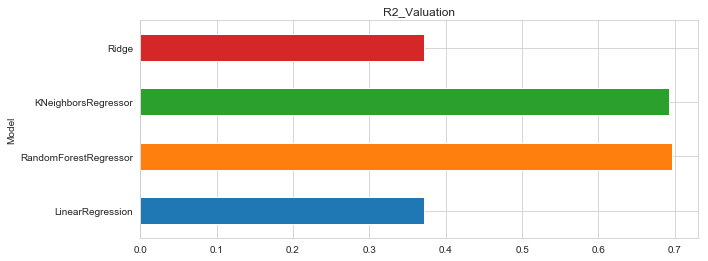

,R2_Valuation
Model,
LinearRegression,0.371117
RandomForestRegressor,0.695812
KNeighborsRegressor,0.692630
Ridge,0.371241


In [14]:
models = [LinearRegression(),
          RandomForestRegressor(),
          KNeighborsRegressor(n_neighbors=8),
         # Lasso(),
          Ridge()
         ]

TestModels = pd.DataFrame()
tmp = {}

for model in models:
    # get model name
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
    
    # fit model on training dataset
    model.fit(Xtrn, Ytrn)
    
    # predict prices for test dataset and calculate r^2
    tmp['R2_Valuation'] = r2_score(Ytest, model.predict(Xtest))

    # write obtained data
    TestModels = TestModels.append([tmp])
    
    

TestModels.set_index('Model', inplace=True)

fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.R2_Valuation.plot(ax=axes, kind='barh', title='R2_Valuation')
plt.show()
TestModels

Linear: 0.357124 (0.112477)
Ridge: 0.359710 (0.112818)
RF_R: 0.624646 (0.073970)


C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

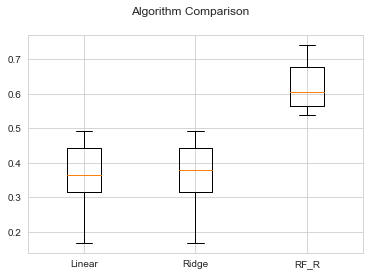

In [16]:
# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('Linear',   LinearRegression()))
models.append(('Ridge',Ridge()))
models.append(('RF_R', RandomForestRegressor()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    cv_results = cross_val_score(model, Xtrn, Ytrn, cv=5)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Model we will be using will be Random Forest Regression

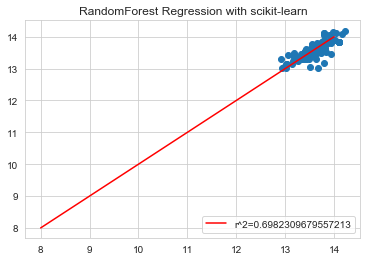

In [18]:
import pylab as pl
# Xtrn, Xtest, Ytrn, Ytest 
rf = RandomForestRegressor(n_estimators=20)
rf.fit(Xtrn, Ytrn['log_valuation'])

r2 = r2_score(Ytest['log_valuation'], rf.predict(Xtest))
mse = np.mean((Ytest['log_valuation'] - rf.predict(Xtest))**2)

pl.scatter(Ytest['log_valuation'], rf.predict(Xtest))
pl.plot(np.arange(8, 15), np.arange(8, 15), label="r^2=" + str(r2), c="r")
pl.legend(loc="lower right")
pl.title("RandomForest Regression with scikit-learn")
pl.show()

In [ ]:
Xtest
